# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

On utilise la loi forte des grands nombres pour montrer que E(L|Z=z) peut être approché par $\frac{1}{K} \sum_{k=1}^{K}{l_{(k)}}$ .
On note h(Z) la variable aléatoire définie par h(Z)=E(L|Z). D'après un théorème du cours de proba IV, on a E(h(Z))=E(L) (L est supposée intégrable). Ensuite, d'après l'énoncée, on génère une échantillon $(Z_1,...,Z_K)$~$P_Z$ et on note $M_K(h)=\frac{1}{K} \sum_{k=1}^{K}{h(Z_k)}=\frac{1}{K} \sum_{k=1}^K{l_{(k)}}$.

On a alors par la loi forte des grands nombres $M_K(h) \to E(h(Z))=E(L)$

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

On cherche la loi de $Z|Z(x_{j_1})=z(x_{j_1}),...,Z(x_{j_n})=z(x_{j_n})$
En utilisant le resultat du poly de probabilité IV sur les vecteurs gaussiens à densité, on trouve que ce vecteur aléatoire suit une loi gaussienne, dont il faut maintenant préciser le vecteur d'esperance m et la matrice de covariance Cov.



3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

Tout d'abord,$\mathbf{Z}$ est un vecteur gaussien comme combinaison linéaire de variables aléatoires gaussiennes, , $E(\mathbf{Z})=E(m+R\mathbf{Y})=m$ et $V(\mathbf{Z})=E((R\mathbf{Y})^2)=RI_pR^t=RR^t$



4. En déduire un algorithme de simulation conditionnelle.

On a donc $Z|Z(x_{j_1})=z(x_{j_1}),...,Z(x_{j_n})=z(x_{j_n})$ un vecteur gaussien dont on connait le vecteur d'esperance m et la matrice de covariance Cov. Il suffit alors d'appliquer la méthode de $Cholesky$ (p11 du poly proba V) pour simuler ce vecteur gaussien.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
n=len(observation_indexes)
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
def covariance(d,a,sigma2):
    return sigma2*np.exp(-np.abs(d)/a)
    

2. Calculer la matrice de distance.

In [3]:
mat_dist=np.zeros((101,101))
for i in range(101):
    for j in range(101):
        mat_dist[i,j]=np.abs(j-i)*Delta
mat_dist

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
C=covariance(mat_dist,a,sigma2)
C

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
#Entre les observations
cov_obs=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        cov_obs[i,j]=C[observation_indexes[i],observation_indexes[j]]
cov_obs


       

array([[1.20000000e+01, 1.62402340e+00, 2.19787667e-01, 2.97450261e-02,
        4.02555153e-03, 5.44799157e-04],
       [1.62402340e+00, 1.20000000e+01, 1.62402340e+00, 2.19787667e-01,
        2.97450261e-02, 4.02555153e-03],
       [2.19787667e-01, 1.62402340e+00, 1.20000000e+01, 1.62402340e+00,
        2.19787667e-01, 2.97450261e-02],
       [2.97450261e-02, 2.19787667e-01, 1.62402340e+00, 1.20000000e+01,
        1.62402340e+00, 2.19787667e-01],
       [4.02555153e-03, 2.97450261e-02, 2.19787667e-01, 1.62402340e+00,
        1.20000000e+01, 1.62402340e+00],
       [5.44799157e-04, 4.02555153e-03, 2.97450261e-02, 2.19787667e-01,
        1.62402340e+00, 1.20000000e+01]])

In [6]:
#Entre observations et inconnues
cov_obs_unknown=np.zeros((n,N-n))
for i in range(n):
    for j in range(N-n):
        cov_obs_unknown[i,j]=C[observation_indexes[i],unknown_indexes[j]]
            
            
cov_obs_unknown

array([[1.08580490e+01, 9.82476904e+00, 8.88981865e+00, 8.04384055e+00,
        7.27836792e+00, 6.58573963e+00, 5.95902365e+00, 5.39194757e+00,
        4.87883592e+00, 4.41455329e+00, 3.99445300e+00, 3.61433054e+00,
        3.27038152e+00, 2.95916357e+00, 2.67756192e+00, 2.42275822e+00,
        2.19220229e+00, 1.98358666e+00, 1.79482343e+00, 1.46947714e+00,
        1.32963790e+00, 1.20310612e+00, 1.08861544e+00, 9.85019983e-01,
        8.91282939e-01, 8.06466153e-01, 7.29720752e-01, 6.60278641e-01,
        5.97444820e-01, 5.40590429e-01, 4.89146448e-01, 4.42598009e-01,
        4.00479240e-01, 3.62368601e-01, 3.27884669e-01, 2.96682318e-01,
        2.68449262e-01, 2.42902937e-01, 1.98872105e-01, 1.79946922e-01,
        1.62822708e-01, 1.47328079e-01, 1.33307958e-01, 1.20622029e-01,
        1.09143325e-01, 9.87569646e-02, 8.93589969e-02, 8.08553640e-02,
        7.31609588e-02, 6.61987730e-02, 5.98991269e-02, 5.41989713e-02,
        4.90412573e-02, 4.43743646e-02, 4.01515855e-02, 3.633065

In [7]:
#Entre les inconnues

cov_unknown_unknown=np.zeros((N-n,N-n))
for i in range(N-n):
    for j in range(N-n):
        cov_unknown_unknown[i,j]=C[unknown_indexes[i],unknown_indexes[j]]

cov_unknown_unknown



array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
       ...,
       [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

In [11]:
#On va utiliser les notations introduites dnas le poly de probaIV
#Ainsi Y est le vecteur gaussien des inconnues, et Z celui des connues
z=depth
mz=np.array(n*[mu])
my=np.array((N-n)*[mu])
Cy=cov_unknown_unknown
Czy=cov_obs_unknown
Cyz=np.transpose(Czy)
Cz=cov_obs



5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

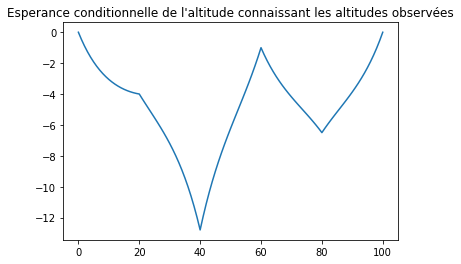

In [39]:
#On utilise le resultat du poly probaIV

m=my+np.dot(Cyz,np.dot(np.linalg.inv(Cz),z-mz))
alt_esp=np.zeros(101)
for j in range(N-n):
    alt_esp[unknown_indexes[j]]=m[j]
for i in range(n):
    alt_esp[observation_indexes[i]]=z[i]
    
plt.plot(alt_esp)
plt.title("Esperance conditionnelle de l'altitude connaissant les altitudes observées")
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

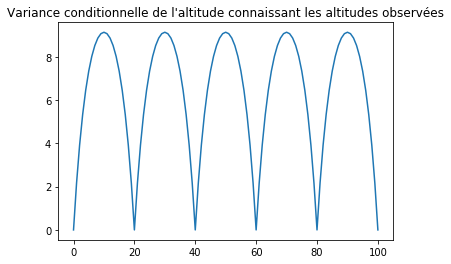

In [40]:
#on utilise encore le poly de proba IV

CSy=Cy-np.dot(Cyz,np.dot(np.linalg.inv(Cz),Czy))

alt_cov=np.zeros(N)
for j in range(N-n):
    alt_cov[unknown_indexes[j]]=CSy[j,j]

plt.plot(alt_cov)
plt.title("Variance conditionnelle de l'altitude connaissant les altitudes observées")
plt.show()

On voit que la variance augmente puis diminue entre chaque point de mesure, avec un maximum local (environ au milieu). Cela est logique, car les points où on est le moins 'sûr' de l'altitude sont les points les plus éloignés des mesures, et plus on est éloigné d'un point d'observation, moins on est certains de l'altitude.

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

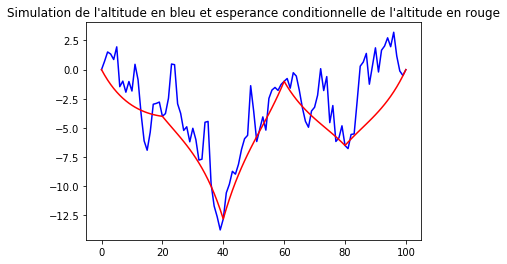

In [54]:
#On va appliquer la méthode de Cholesky pour simuler vecteur gaussien d'esperance m
#et de matrice de covariance CSy
#on va definir une fct qui fournit une simulation de l'altitude, pour simplifier son utilisation plus tard
def altitude():
    Y=np.random.randn(N-n) 
    R = np.linalg.cholesky(CSy)
    Z_unknown=m+np.dot(R,Y) 
    Z_total=np.zeros(N)
    for i in range(n):
        Z_total[observation_indexes[i]]=z[i] #on rajoute tt de même les altitudes observées
    for j in range(N-n):
        Z_total[unknown_indexes[j]]=Z_unknown[j]
    return Z_total

Z_total=altitude()
plt.plot(Z_total,"b")
plt.plot(alt_esp,"r")
plt.title("Simulation de l'altitude en bleu et esperance conditionnelle de l'altitude en rouge")
plt.show()




8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [53]:
def longueur_cable(Z_total,Delta):
    l=0
    for i in range(1,N):
        l+=np.sqrt(Delta**2+(Z_total[i]-Z_total[i-1])**2)
    return l

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [68]:
K=100
L_estime=0
for k in range(K):
    L_estime+=longueur_cable(altitude(),Delta)
L_estime/=K
L_esp=longueur_cable(alt_esp,Delta)
print(f"la différence entre la longueur estimée et celle donnée par l'esperance conditionnelle pour K={K} simulations vaut {np.abs(L_estime-L_esp)}m")

la différence entre la longueur estimée et celle donnée par l'esperance conditionnelle pour K=100 simulations vaut 20.716689307477907m


10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

11. Représenter l'histogramme des longueurs de câbles générées.

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.